In [2]:
%pip install --upgrade pip
%pip install numpy pandas scikit-learn matplotlib xgboost lightgbm category-encoders gdown


  Using cached pip-25.2-py3-none-any.whl.metadata (4.7 kB)
Using cached pip-25.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 25.1
    Uninstalling pip-25.1:
      Successfully uninstalled pip-25.1
Note: you may need to restart the kernel to use updated packages.
  Using cached filelock-3.19.1-py3-none-any.whl.metadata (2.1 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
    --------------------------------------- 1.0/56.8 MB 3.9 MB/s eta 0:00:15
   - -------------------------------------- 1.6/56.8 MB 3.5 MB/s eta 0:00:16
   - -------------------------------------- 2.4/56.8 MB 3.2 MB/s eta 0:00:18
   -- ------------------------------------- 2.9/56.8 MB 3.2 MB/s eta 0:00:18
   -- ------------------------------------- 3.7/56.8 MB 3.3 MB/s eta 0:00:17
   -- --------------------------------

In [3]:
import os, random, numpy as np
SEED = 42
random.seed(SEED); np.random.seed(SEED); os.environ["PYTHONHASHSEED"] = str(SEED)


In [4]:
from gdown import download

# Train
download(id="128XLT44uu9bVSBPd6JiiYyv_M4LJP-3x", output="train.csv", quiet=False)
# Test
download(id="1JMUa5MIwyx3QEXk3KKt_u0AeMIDUjJUx", output="test.csv", quiet=False)


Downloading...
From: https://drive.google.com/uc?id=128XLT44uu9bVSBPd6JiiYyv_M4LJP-3x
To: c:\Users\demit\Desktop\EM07_QuantumByte\AI Task\Task02\train.csv
100%|██████████| 2.32M/2.32M [00:01<00:00, 1.64MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JMUa5MIwyx3QEXk3KKt_u0AeMIDUjJUx
To: c:\Users\demit\Desktop\EM07_QuantumByte\AI Task\Task02\test.csv
100%|██████████| 452k/452k [00:00<00:00, 1.43MB/s]


'test.csv'

In [5]:
import pandas as pd

train = pd.read_csv("train.csv")
test  = pd.read_csv("test.csv")

print(train.shape, test.shape)
train.head()


(18154, 21) (4323, 20)


,house_id,sale_date,num_bedrooms,num_bathrooms,living_area,lot_area,num_floors,is_waterfront,view_rating,condition_index,...,above_area,basement_area,built_year,renovated_year,zip_area,latitude,longitude,neighbor_living_area,neighbor_lot_area,target_price
0,8902000050,20141027T000000,3,1.75,1720.0,7200.0,1.0,0,0.0,3,...,1420.0,300.0,1959,0.0,98125,47.7062,-122.304,1380,8000,622200.0
1,4325700085,20150325T000000,3,1.00,1310.0,8514.0,1.0,0,0.0,4,...,1310.0,0.0,1953,0.0,98133,47.7502,-122.353,1310,8514,417000.0
2,7732410420,20140617T000000,3,2.50,2590.0,7720.0,2.0,0,0.0,3,...,2590.0,0.0,1988,0.0,98007,47.6590,-122.146,2600,9490,809000.0
3,4039701280,20150408T000000,3,2.25,2440.0,9689.0,1.0,0,2.0,4,...,1830.0,610.0,1974,0.0,98008,47.6141,-122.111,2730,9689,954500.0
4,5379805120,20150424T000000,2,1.00,740.0,7380.0,1.0,0,0.0,4,...,740.0,0.0,1951,0.0,98188,47.4481,-122.278,1500,10075,213000.0


In [6]:
train.info()
train.isna().mean().sort_values(ascending=False).head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18154 entries, 0 to 18153
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   house_id              18154 non-null  int64  
 1   sale_date             18154 non-null  object 
 2   num_bedrooms          18154 non-null  int64  
 3   num_bathrooms         16702 non-null  float64
 4   living_area           18154 non-null  float64
 5   lot_area              18154 non-null  float64
 6   num_floors            18154 non-null  float64
 7   is_waterfront         18154 non-null  int64  
 8   view_rating           16702 non-null  float64
 9   condition_index       18154 non-null  object 
 10  construction_grade    18154 non-null  object 
 11  above_area            18154 non-null  float64
 12  basement_area         16702 non-null  float64
 13  built_year            18154 non-null  int64  
 14  renovated_year        16702 non-null  object 
 15  zip_area           

num_bathrooms           0.079982
basement_area           0.079982
renovated_year          0.079982
view_rating             0.079982
house_id                0.000000
living_area             0.000000
num_bedrooms            0.000000
sale_date               0.000000
num_floors              0.000000
is_waterfront           0.000000
condition_index         0.000000
construction_grade      0.000000
lot_area                0.000000
above_area              0.000000
built_year              0.000000
zip_area                0.000000
latitude                0.000000
longitude               0.000000
neighbor_living_area    0.000000
neighbor_lot_area       0.000000
dtype: float64

In [8]:
import numpy as np
import pandas as pd

def to_num(col: pd.Series) -> pd.Series:
    """Coerce texty numbers like 'N/A', '' to NaN, then to numeric."""
    if col.dtype.kind in "biufc":  # already numeric
        return col
    s = col.astype(str).str.strip()
    s = s.replace(
        {"": np.nan, "na": np.nan, "Na": np.nan, "NA": np.nan,
         "nan": np.nan, "NaN": np.nan, "NONE": np.nan, "none": np.nan, "None": np.nan},
        regex=False
    )
    return pd.to_numeric(s, errors="coerce")

def to_bool01(col: pd.Series) -> pd.Series:
    """Map common boolean strings to 0/1. Unknowns → 0."""
    if col.dtype == bool:
        return col.astype("int64")
    s = col.astype(str).str.strip().str.lower()
    truthy = {"1","y","yes","true","t"}
    falsy  = {"0","n","no","false","f","nan","none",""}
    out = np.where(s.isin(truthy), 1, np.where(s.isin(falsy), 0, 0))
    return pd.Series(out, index=col.index, dtype="int64")

def preprocess_raw(df: pd.DataFrame, is_train=True) -> pd.DataFrame:
    out = df.copy()

    # Dates
    out["sale_date"] = pd.to_datetime(out["sale_date"], errors="coerce")
    out["sale_year"]  = out["sale_date"].dt.year
    out["sale_month"] = out["sale_date"].dt.month
    out["sale_qtr"]   = out["sale_date"].dt.quarter

    # Force numeric on all numeric-like columns first
    numeric_cols = [
        "built_year","renovated_year","bedrooms","bathrooms","floors",
        "living_area","above_area","basement_area","lot_area","latitude","longitude"
    ]
    for c in numeric_cols:
        if c in out.columns:
            out[c] = to_num(out[c])

    # Waterfront boolean could be text
    if "is_waterfront" in out.columns:
        out["is_waterfront"] = to_bool01(out["is_waterfront"])

    # Renovation features
    out["renovated_year"] = out["renovated_year"].fillna(0)
    out["is_renovated"]   = (out["renovated_year"] > 0).astype(int)

    # Ages
    out["house_age_at_sale"] = out["sale_year"] - out["built_year"]
    out.loc[out["house_age_at_sale"] < 0, "house_age_at_sale"] = np.nan

    yrs_since_reno = out["sale_year"] - out["renovated_year"]
    yrs_since_reno = yrs_since_reno.where(out["renovated_year"] > 0, np.nan)
    out["years_since_renovation"] = yrs_since_reno

    # Area features with safe math
    out["living_area"]   = out["living_area"].fillna(0)
    out["basement_area"] = out["basement_area"].fillna(0)
    out["total_area"]    = out["living_area"] + out["basement_area"]

    out["above_ratio"] = out["above_area"] / out["living_area"]
    out.loc[~np.isfinite(out["above_ratio"]), "above_ratio"] = np.nan

    # Categorical hygiene
    if "zip_area" in out.columns:
        out["zip_area"] = out["zip_area"].astype("string")

    # Drop raw date after extracting parts
    out = out.drop(columns=["sale_date"])

    return out

# Re-run preprocessing
train_fe = preprocess_raw(train, is_train=True)
test_fe  = preprocess_raw(test,  is_train=False)

train_fe.head()


,house_id,num_bedrooms,num_bathrooms,living_area,lot_area,num_floors,is_waterfront,view_rating,condition_index,construction_grade,...,neighbor_lot_area,target_price,sale_year,sale_month,sale_qtr,is_renovated,house_age_at_sale,years_since_renovation,total_area,above_ratio
0,8902000050,3,1.75,1720.0,7200.0,1.0,0,0.0,3,7,...,8000,622200.0,2014,10,4,0,55.0,NaN,2020.0,0.825581
1,4325700085,3,1.00,1310.0,8514.0,1.0,0,0.0,4,7,...,8514,417000.0,2015,3,1,0,62.0,NaN,1310.0,1.000000
2,7732410420,3,2.50,2590.0,7720.0,2.0,0,0.0,3,9,...,9490,809000.0,2014,6,2,0,26.0,NaN,2590.0,1.000000
3,4039701280,3,2.25,2440.0,9689.0,1.0,0,2.0,4,8,...,9689,954500.0,2015,4,2,0,41.0,NaN,3050.0,0.750000
4,5379805120,2,1.00,740.0,7380.0,1.0,0,0.0,4,6,...,10075,213000.0,2015,4,2,0,64.0,NaN,740.0,1.000000


Linear(log-target) → RMSE: 429,868.79 | MAE: 97,452.71 | R^2: -0.4067
RandomForest → RMSE: 146,624.94 | MAE: 79,334.27 | R^2: 0.8363

Best model: RandomForest | RMSE=146,624.94, MAE=79,334.27, R²=0.8363
Saved trained model to: best_model_RandomForest.pkl
Saved predictions to: EN07_QuantumByte_Task2_Predictions.csv

Validation metrics:
       Model          RMSE          MAE        R2
 Linear(log) 429868.789215 97452.710573 -0.406717
RandomForest 146624.938016 79334.273696  0.836337
Saved metrics image to: EN07_QuantumByte_Task2_Metrics.png


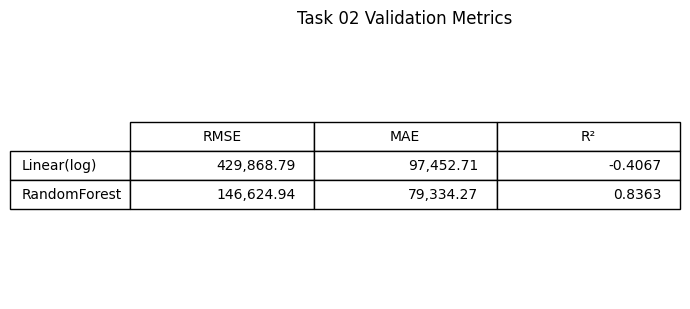

In [12]:
# === Clean target, split, train two models, print metrics, save best model & predictions ===
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from joblib import dump
import matplotlib.pyplot as plt

# ---------- 0) Ensure target is numeric and > 0 ----------
TARGET = "target_price"

train_fe[TARGET] = pd.to_numeric(train_fe[TARGET], errors="coerce")
bad_mask = (~np.isfinite(train_fe[TARGET])) | (train_fe[TARGET] <= 0)
if bad_mask.any():
    print(f"Dropping {bad_mask.sum()} rows with invalid '{TARGET}'.")
train_fe = train_fe.loc[~bad_mask].copy()

# Optional: clip tiny fraction of outliers
lo, hi = train_fe[TARGET].quantile([0.001, 0.999])
train_fe[TARGET] = train_fe[TARGET].clip(lo, hi)

# ---------- 1) Features / split ----------
features = [c for c in train_fe.columns if c not in ["house_id", TARGET]]

train_fe = train_fe.sort_values(["sale_year", "sale_month"], na_position="last").reset_index(drop=True)
split_idx = int(len(train_fe) * 0.8)
tr = train_fe.iloc[:split_idx].reset_index(drop=True)
va = train_fe.iloc[split_idx:].reset_index(drop=True)

X_train = tr[features]
y_train = tr[TARGET].astype(float)
X_valid = va[features]
y_valid = va[TARGET].astype(float)
X_test  = test_fe[features]

# ---------- 2) Preprocessing ----------
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in X_train.columns if c not in num_cols]

numeric_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
])

# Handle old/new sklearn API for OneHotEncoder
try:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
except TypeError:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

categorical_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe",     ohe)
])

pre = ColumnTransformer([
    ("num", numeric_pipe, num_cols),
    ("cat", categorical_pipe, cat_cols)
])

# ---------- 3) Train two models ----------
def evaluate(y_true, y_pred, name):
    # Older sklearn: no 'squared' kwarg, so compute RMSE manually
    mse  = mean_squared_error(y_true, y_pred)
    rmse = float(np.sqrt(mse))
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)
    print(f"{name} → RMSE: {rmse:,.2f} | MAE: {mae:,.2f} | R^2: {r2:.4f}")
    return rmse, mae, r2

# Model A: Linear on log-target
lin = Pipeline([("pre", pre), ("lr", LinearRegression())])
lin.fit(X_train, np.log1p(y_train))
pred_lin = np.expm1(lin.predict(X_valid))
rmse_lin, mae_lin, r2_lin = evaluate(y_valid, pred_lin, "Linear(log-target)")

# Model B: RandomForest on raw target
rf = Pipeline([("pre", pre),
               ("rf", RandomForestRegressor(
                   n_estimators=400, random_state=42, n_jobs=-1
               ))])
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_valid)
rmse_rf, mae_rf, r2_rf = evaluate(y_valid, pred_rf, "RandomForest")

# ---------- 4) Pick best by RMSE ----------
cand = [("Linear(log)", rmse_lin, mae_lin, r2_lin, lin, "log"),
        ("RandomForest", rmse_rf, mae_rf, r2_rf, rf,  "plain")]
best_name, best_rmse, best_mae, best_r2, best_model, mode = sorted(cand, key=lambda t: t[1])[0]
print("\nBest model:", best_name,
      f"| RMSE={best_rmse:,.2f}, MAE={best_mae:,.2f}, R²={best_r2:.4f}")

# ---------- 5) Refit best on ALL training data ----------
X_all = train_fe[features]
y_all = train_fe[TARGET].astype(float)

if mode == "log":
    best_model.fit(X_all, np.log1p(y_all))
else:
    best_model.fit(X_all, y_all)

# ---------- 6) Save the trained model ----------
model_path = "best_model_{}.pkl".format(best_name.replace("(", "").replace(")", "").replace(" ", "_"))
dump(best_model, model_path)
print(f"Saved trained model to: {model_path}")

# ---------- 7) Predict test and export CSV ----------
test_pred = best_model.predict(X_test)
if mode == "log":
    test_pred = np.expm1(test_pred)

pred_df = pd.DataFrame({
    "house_id": test_fe["house_id"].astype(int),
    "predicted_price": np.maximum(test_pred, 0).round(0).astype(int)
})
pred_csv = "EN07_QuantumByte_Task2_Predictions.csv"
pred_df.to_csv(pred_csv, index=False)
print(f"Saved predictions to: {pred_csv}")

# ---------- 8) Print & save a small metrics image ----------
metrics_tbl = pd.DataFrame({
    "Model": ["Linear(log)", "RandomForest"],
    "RMSE":  [rmse_lin, rmse_rf],
    "MAE":   [mae_lin,  mae_rf],
    "R2":    [r2_lin,   r2_rf]
})
print("\nValidation metrics:")
print(metrics_tbl.to_string(index=False))

plt.figure(figsize=(7, 3.2))
tbl = plt.table(
    cellText=[[f"{v:,.2f}", f"{w:,.2f}", f"{z:.4f}"]
              for v,w,z in zip(metrics_tbl["RMSE"], metrics_tbl["MAE"], metrics_tbl["R2"])],
    rowLabels=metrics_tbl["Model"].tolist(),
    colLabels=["RMSE", "MAE", "R²"],
    loc="center"
)
tbl.scale(1, 1.6)
plt.axis("off")
plt.title("Task 02 Validation Metrics")
plt.tight_layout()
png_path = "EN07_QuantumByte_Task2_Metrics.png"
plt.savefig(png_path, dpi=200)
print(f"Saved metrics image to: {png_path}")
